# Temporal evolution of sea-ice edge latitude for selected simulations of 0L-Semtner unlimited and limited

In [1]:
%matplotlib inline
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats


def load_experiment(expname): #loads the dataset of a simulation
    fname = expname +"_atm_2d_ml.ym.gm.nc" #filename of global yearly mean
    dpath = "/work/bb1092/pp_JH/" +expname +"/" #simulation path
    DS = xr.open_dataset(dpath +fname, decode_times=False) #loading of dataset
    print(dpath +fname)
    return expname, DS # returns the name of the experiment & the actual dataset

def get_var(dataset, varname, offsettime): #gets the dataarray with one specific variable
    da=getattr(dataset,varname) #read dataarray
    da.squeeze() #squeeze dataarray (time is the only dimension)
    if offsettime:
        da=da.assign_coords(time=((da.time-da.time[0])/360)) #change time units from days to years & move the origin to 0
    else:
        da=da.assign_coords(time=((da.time)/360)) #change time units from days to years 
    return da

def legend_color(ax, handle_array, pos, fontsize):
    legend = ax.legend(handle_array,handlelength=0, handletextpad=0, edgecolor='none', facecolor='none', markerscale=0, loc=pos, fontsize=fontsize)
    for item in legend.legendHandles:
        item.set_visible(False)
    for text in legend.get_texts():
        if text.get_text()=='Winton':
            text.set_color('C1')
        if text.get_text()=='3L-Winton':
            text.set_color('C1')
        elif text.get_text()=='Semtner':
            text.set_color('C0')
        elif text.get_text()=='0L-Semtner':
            text.set_color('C0')
        elif text.get_text()=='Semtner_5m':
            text.set_color('C2')
        elif text.get_text()=='0L-Semtner-lim5':
            text.set_color('C2')
        elif text.get_text()=='0L-Semtner-limited':
            text.set_color('C2')
        elif text.get_text()=='1438ppmv':
            text.set_color('C0')
        elif text.get_text()=='1500ppmv':
            text.set_color('C1')
        elif text.get_text()=='3000ppmv':
            text.set_color('C2')
        elif text.get_text()=='5000ppmv':
            text.set_color('C3')
            
    return legend

In [2]:
experiment1, DS1 = load_experiment("mlo_aqua_3000ppmv_77sic_hice_unlim")
experiment2, DS2 = load_experiment("mlo_aqua_5000ppmv_77sic_hice_unlim")
experiment3, DS3 = load_experiment("mlo_aqua_1500ppmv_hice_unlim")

experiment1_5m, DS1_5m = load_experiment("mlo_aqua_3000ppmv_Jor2")
experiment2_5m, DS2_5m = load_experiment("mlo_aqua_5000ppmv_Jor2")
experiment3_5m, DS3_5m = load_experiment("mlo_aqua_1500ppmv")



/work/bb1092/pp_JH/mlo_aqua_3000ppmv_77sic_hice_unlim/mlo_aqua_3000ppmv_77sic_hice_unlim_atm_2d_ml.ym.gm.nc
/work/bb1092/pp_JH/mlo_aqua_5000ppmv_77sic_hice_unlim/mlo_aqua_5000ppmv_77sic_hice_unlim_atm_2d_ml.ym.gm.nc
/work/bb1092/pp_JH/mlo_aqua_1500ppmv_hice_unlim/mlo_aqua_1500ppmv_hice_unlim_atm_2d_ml.ym.gm.nc
/work/bb1092/pp_JH/mlo_aqua_3000ppmv_Jor2/mlo_aqua_3000ppmv_Jor2_atm_2d_ml.ym.gm.nc
/work/bb1092/pp_JH/mlo_aqua_5000ppmv_Jor2/mlo_aqua_5000ppmv_Jor2_atm_2d_ml.ym.gm.nc
/work/bb1092/pp_JH/mlo_aqua_1500ppmv/mlo_aqua_1500ppmv_atm_2d_ml.ym.gm.nc


In [3]:
da1=get_var(DS1,"sic",True)
da2=get_var(DS2,"sic",True)
da3=get_var(DS3,"sic",True)
da1_5m=get_var(DS1_5m,"sic",True)
da2_5m=get_var(DS2_5m,"sic",True)
da3_5m=get_var(DS3_5m,"sic",True)

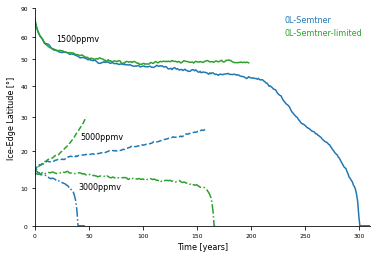

In [10]:
# sea ice latitude
labelsize=8
ticksize=6

fig, ax = plt.subplots(figsize=(6,4))
ice_lat1 = np.arcsin(1-da1) * (180./np.pi) 
ice_lat1_5m = np.arcsin(1-da1_5m) * (180./np.pi) 

ice_lat2 = np.arcsin(1-da2) * (180./np.pi) 
ice_lat2_5m = np.arcsin(1-da2_5m) * (180./np.pi) 

ice_lat3 = np.arcsin(1-da3) * (180./np.pi) 
ice_lat3_5m = np.arcsin(1-da3_5m) * (180./np.pi) 

(1-da1).plot(color='C0',ls='-.')
(1-da1_5m).plot(color='C2',ls='-.')

(1-da2).plot(color='C0',ls='--')
(1-da2_5m).plot(color='C2',ls='--')

(1-da3).plot(color='C0',ls='-')
(1-da3_5m).plot(color='C2',ls='-')
plt.xlim(0,310)
plt.xlabel("Time [years]", fontsize=labelsize)
plt.ylabel("Ice-Edge Latitude [°]", fontsize=labelsize)

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

ax.set_yticks([np.sin(np.radians(0)),np.sin(np.radians(10)),np.sin(np.radians(20)),np.sin(np.radians(30)),np.sin(np.radians(40)),np.sin(np.radians(50)),np.sin(np.radians(60)),np.sin(np.radians(90))])
ax.set_yticklabels([0,10,20,30,40,50,60,90])
plt.ylim(0,1)

plt.title("")
legend_color(ax,['0L-Semtner','0L-Semtner-limited'],1, labelsize)

ax.annotate('5000ppmv',(42,0.4), fontsize=labelsize)
ax.annotate('3000ppmv',(40,0.17), fontsize=labelsize)
ax.annotate('1500ppmv',(20,0.85), fontsize=labelsize)
ax.tick_params(labelsize=ticksize) 

plt.savefig("plots/icelat_comparison.pdf")